In [15]:
import pandas as pd
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)

trans

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-64,Gen Z & Boomers
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-64,Gen Z & Boomers
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-44,Adultxs
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,55-64,Gen Z & Boomers
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-54,Divorciadxs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,21379,47.0,technician,divorced,secondary,no,236,no,no,cellular,18,aug,263,4,-1,0,unknown,no,45-54,Divorciadxs
16158,21380,33.0,management,married,tertiary,no,6513,yes,no,cellular,11,jan,170,1,343,1,other,yes,25-34,Millenials
16159,21381,42.0,admin.,married,secondary,no,329,no,no,cellular,19,aug,347,3,-1,0,unknown,no,35-44,Adultxs
16160,21382,31.0,services,married,secondary,no,593,yes,no,cellular,19,nov,391,2,-1,0,unknown,no,25-34,Millenials


In [16]:
def saldo_categorico(x):
    if x < 0:
        return "negativo"
    elif  x >= 0 and x <= 550: #Hasta la mediana de clientes
        return 'bajo'
    elif  x > 550  and x <= 1708: 
        return 'medio' #Hasta el percentil 75
    elif  x > 1708:
        return 'alto'
     #Como no hay edades inferiores a 18 no va dar problemas

trans['Saldo'] = trans['balance'].apply(saldo_categorico)
trans # Para visualizar la tabla generada


,id,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil,Saldo
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,may,1042,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,alto
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,may,1467,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,bajo
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,may,1389,1,-1,0,unknown,yes,35-44,Adultxs,medio
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,may,579,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,alto
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,may,673,2,-1,0,unknown,yes,45-54,Divorciadxs,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,21379,47.0,technician,divorced,secondary,no,236,no,no,cellular,...,aug,263,4,-1,0,unknown,no,45-54,Divorciadxs,bajo
16158,21380,33.0,management,married,tertiary,no,6513,yes,no,cellular,...,jan,170,1,343,1,other,yes,25-34,Millenials,alto
16159,21381,42.0,admin.,married,secondary,no,329,no,no,cellular,...,aug,347,3,-1,0,unknown,no,35-44,Adultxs,bajo
16160,21382,31.0,services,married,secondary,no,593,yes,no,cellular,...,nov,391,2,-1,0,unknown,no,25-34,Millenials,medio


In [4]:
#Chi cuadrada para los perfiles
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Supongamos que tienes un DataFrame con 3 variables categóricas
df = trans

vars_categoricas = ["Clase de edad", "job", "marital", "education","Perfil"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

# Si el p-valor es inferior a 0,5 quiere decir que hay relación entre las variables ya que la hipótesis nula es que son independientes. 
# Por tanto si el p-valor es superior a 0,5 las variables son independientes.

Clase de edad vs job -> Chi2=11638.164, p=0.000
Clase de edad vs marital -> Chi2=4013.401, p=0.000
Clase de edad vs education -> Chi2=1225.425, p=0.000
Clase de edad vs Perfil -> Chi2=48486.000, p=0.000
job vs marital -> Chi2=1862.230, p=0.000
job vs education -> Chi2=10352.123, p=0.000
job vs Perfil -> Chi2=5324.977, p=0.000
marital vs education -> Chi2=517.900, p=0.000
marital vs Perfil -> Chi2=2768.451, p=0.000
education vs Perfil -> Chi2=914.482, p=0.000


In [ ]:
#Chi cuadrada para los perfiles
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

#variables categóricas
df = trans

vars_categoricas = ["Clase de edad", "job", "marital", "education","Perfil"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

# Si el p-valor es inferior a 0,05 quiere decir que hay relación entre las variables ya que la hipótesis nula es que son independientes. 
# Por tanto si el p-valor es superior a 0,05 las variables son independientes.

#Chi cuadrada para los productos financieros
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# variables categóricas
df = trans

vars_categoricas = ["Perfil", "deposit", "housing", "loan","default","Saldo"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

Clase de edad vs job -> Chi2=11638.164, p=0.000
Clase de edad vs marital -> Chi2=4013.401, p=0.000
Clase de edad vs education -> Chi2=1225.425, p=0.000
Clase de edad vs Perfil -> Chi2=48486.000, p=0.000
job vs marital -> Chi2=1862.230, p=0.000
job vs education -> Chi2=10352.123, p=0.000
job vs Perfil -> Chi2=5324.977, p=0.000
marital vs education -> Chi2=517.900, p=0.000
marital vs Perfil -> Chi2=2768.451, p=0.000
education vs Perfil -> Chi2=914.482, p=0.000
Perfil vs deposit -> Chi2=278.915, p=0.000
Perfil vs housing -> Chi2=755.624, p=0.000
Perfil vs loan -> Chi2=93.694, p=0.000
Perfil vs default -> Chi2=6.797, p=0.079
Perfil vs Saldo -> Chi2=224.043, p=0.000
deposit vs housing -> Chi2=649.303, p=0.000
deposit vs loan -> Chi2=185.217, p=0.000
deposit vs default -> Chi2=18.696, p=0.000
deposit vs Saldo -> Chi2=355.644, p=0.000
housing vs loan -> Chi2=92.707, p=0.000
housing vs default -> Chi2=5.455, p=0.020
housing vs Saldo -> Chi2=397.314, p=0.000
loan vs default -> Chi2=103.481, p=0

In [35]:
#Chi cuadrada para todas las variablea a la vez
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)
trans['Saldo'] = trans['balance'].apply(saldo_categorico)
trans = trans[["Clase de edad", "job", "marital", "education", "deposit", "housing", "loan","default","Saldo"]]

df = trans

vars_categoricas = ["Clase de edad", "job", "marital", "education", "deposit", "housing", "loan","default","Saldo"]

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{v1} vs {v2} -> Chi2={chi2:.3f}, p={p:.3f}")

Clase de edad vs job -> Chi2=11638.164, p=0.000
Clase de edad vs marital -> Chi2=4013.401, p=0.000
Clase de edad vs education -> Chi2=1225.425, p=0.000
Clase de edad vs deposit -> Chi2=459.063, p=0.000
Clase de edad vs housing -> Chi2=884.457, p=0.000
Clase de edad vs loan -> Chi2=146.256, p=0.000
Clase de edad vs default -> Chi2=9.562, p=0.089
Clase de edad vs Saldo -> Chi2=382.693, p=0.000
job vs marital -> Chi2=1862.230, p=0.000
job vs education -> Chi2=10352.123, p=0.000
job vs deposit -> Chi2=528.094, p=0.000
job vs housing -> Chi2=1538.596, p=0.000
job vs loan -> Chi2=305.370, p=0.000
job vs default -> Chi2=55.492, p=0.000
job vs Saldo -> Chi2=519.994, p=0.000
marital vs education -> Chi2=517.900, p=0.000
marital vs deposit -> Chi2=158.606, p=0.000
marital vs housing -> Chi2=36.015, p=0.000
marital vs loan -> Chi2=90.821, p=0.000
marital vs default -> Chi2=5.279, p=0.071
marital vs Saldo -> Chi2=83.584, p=0.000
education vs deposit -> Chi2=186.824, p=0.000
education vs housing ->

Coordenadas de las filas:
              0         1
0     -0.345723  0.254242
1     -0.427406  0.139278
2     -0.156127 -0.153386
3     -0.345723  0.254242
4     -0.427406  0.139278
...         ...       ...
16157 -0.028461 -0.248148
16158 -0.345723  0.254242
16159 -0.028461 -0.248148
16160  0.242818 -0.540811
16161  0.053222 -0.133184

[16162 rows x 2 columns]

Coordenadas de las categorías (columnas):
                        0         1
deposit__no      0.518626 -0.435135
deposit__yes    -0.570374  0.478553
housing__no     -0.500239  0.343907
housing__yes     0.561603 -0.386093
loan__no        -0.197167 -0.022253
loan__yes        1.306659  0.147477
default__no     -0.054095 -0.075030
default__yes     3.573624  4.956619
Saldo__alto     -0.683686  0.604417
Saldo__bajo      0.155185 -0.396710
Saldo__medio    -0.166146 -0.356915
Saldo__negativo  2.294932  1.809278


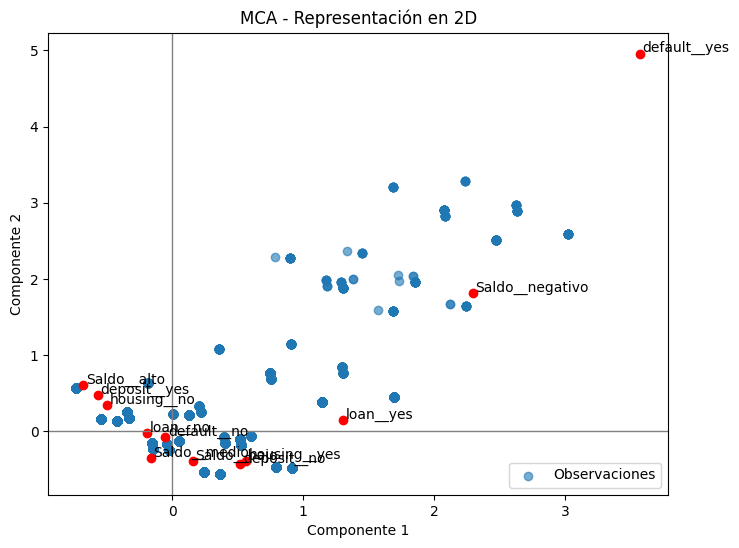

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.298        21.29%                     21.29%
1              0.222        15.89%                     37.18%

Contribución aproximada de cada variable por componente:


,0,1
deposit__no,9%,9%
deposit__yes,10%,10%
housing__no,9%,6%
housing__yes,10%,6%
loan__no,2%,0%
loan__yes,15%,0%
default__no,0%,0%
default__yes,13%,33%
Saldo__alto,8%,8%
Saldo__bajo,1%,6%


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince


trans = trans[["deposit", "housing", "loan", "default", "Saldo"]]
# Crear DataFrame para graficar
# Ajustar el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)

mca = mca.fit(trans)

# Coordenadas de las filas (observaciones en los ejes MCA)
row_coords = mca.row_coordinates(trans)

# Coordenadas de las columnas (categorías en el espacio MCA)
col_coords = mca.column_coordinates(trans)

print("Coordenadas de las filas:")
print(row_coords)

print("\nCoordenadas de las categorías (columnas):")
print(col_coords)

fig, ax = plt.subplots(figsize=(8, 6))

# Puntos de las observaciones
ax.scatter(row_coords[0], row_coords[1], alpha=0.6, label="Observaciones")

# Puntos de las categorías
for i, (x, y) in enumerate(zip(col_coords[0], col_coords[1])):
    ax.scatter(x, y, color="red")
    ax.text(x+0.02, y+0.02, col_coords.index[i], fontsize=10)

ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)
ax.set_title("MCA - Representación en 2D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.legend()
plt.show()

# Varianza explicada por componente
explained =mca.eigenvalues_summary
print(explained)
# Agrupar por nombre de variable (antes del "=" en el índice)
print("\nContribución aproximada de cada variable por componente:")
mca.column_contributions_.style.format('{:.0%}') # 0 es PC1 y 1 es PC2

In [27]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import prince


ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)
trans['Saldo'] = trans['balance'].apply(saldo_categorico)

# Convertir las columnas a tipo categórico (si aún no lo son)
trans = trans[["Clase de edad", "job", "marital", "education"]]
for col in trans.columns:
    trans[col] = trans[col].astype('category')

# Inicializar el modelo K-Modes
kmodes = KModes(n_clusters=4, init='Cao', n_init=10, verbose=0, random_state=42)

# Aplicar el K-Modes al dataframe
perfil = kmodes.fit_predict(trans)

# Mostrar el dataframe con los clusters asignados
trans['Cliente'] = perfil

# Ver los resultados
print(trans)

# Ver los centroides de los clusters
print("Centroides de los clusters: ")
print(kmodes.cluster_centroids_)

trans["Cliente"].value_counts() #Para ver el reparto de grupos por clústers


      Clase de edad           job   marital  education  Cliente
0             55-64        admin.   married  secondary        0
1             55-64        admin.   married  secondary        0
2             35-44    technician   married  secondary        0
3             55-64      services   married  secondary        0
4             45-54        admin.   married   tertiary        2
...             ...           ...       ...        ...      ...
16157         45-54    technician  divorced  secondary        2
16158         25-34    management   married   tertiary        0
16159         35-44        admin.   married  secondary        3
16160         25-34      services   married  secondary        0
16161         35-44  entrepreneur   married   tertiary        1

[16162 rows x 5 columns]
Centroides de los clusters: 
[['25-34' 'management' 'married' 'secondary']
 ['35-44' 'technician' 'single' 'tertiary']
 ['45-54' 'technician' 'married' 'tertiary']
 ['35-44' 'admin.' 'married' 'primary']]


Cliente
0    9520
1    2963
2    2076
3    1603
Name: count, dtype: int64

      deposit housing loan default  Saldo  Cluster
0         yes     yes   no      no   alto        1
1         yes      no   no      no   bajo        0
2         yes     yes   no      no  medio        1
3         yes     yes   no      no   alto        1
4         yes      no   no      no   bajo        0
...       ...     ...  ...     ...    ...      ...
16157      no      no   no      no   bajo        0
16158     yes     yes   no      no   alto        1
16159      no      no   no      no   bajo        0
16160      no     yes   no      no  medio        1
16161      no     yes   no      no   alto        0

[16162 rows x 6 columns]
Centroides de los clusters: 
[['no' 'no' 'no' 'no' 'bajo']
 ['yes' 'yes' 'no' 'no' 'medio']
 ['yes' 'yes' 'no' 'no' 'bajo']
 ['yes' 'no' 'no' 'no' 'alto']]


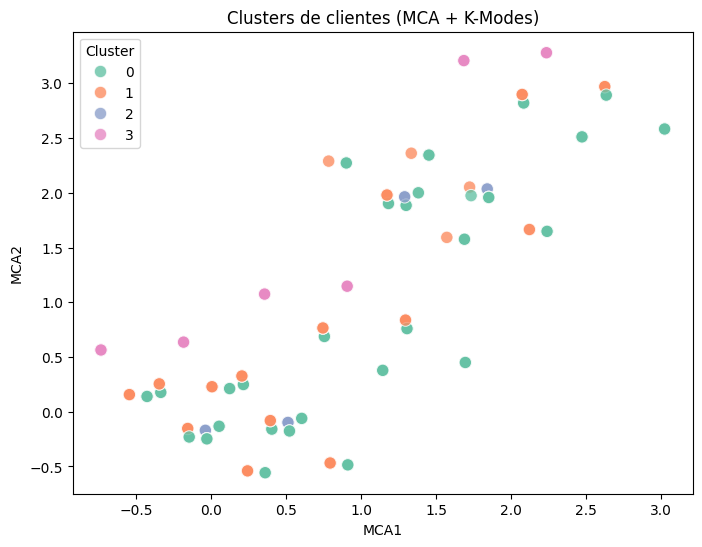

In [34]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import prince

# Convertir las columnas a tipo categórico (si aún no lo son)
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)
trans['Saldo'] = trans['balance'].apply(saldo_categorico)
trans = trans[["deposit", "housing", "loan", "default", "Saldo"]]
for col in trans.columns:
    trans[col] = trans[col].astype('category')

# Inicializar el modelo K-Modes
kmodes = KModes(n_clusters=4, init='Cao', n_init=10, verbose=0, random_state=42)

# Aplicar el K-Modes al dataframe
grupo_financiero = kmodes.fit_predict(trans)

# Mostrar el dataframe con los clusters asignados
trans['Cluster'] = grupo_financiero

# Ver los resultados
print(trans)

# Ver los centroides de los clusters
print("Centroides de los clusters: ")
print(kmodes.cluster_centroids_)

trans["Cluster"].value_counts() #Para ver el reparto de grupos por clústers

import matplotlib.pyplot as plt

# MCA con prince
mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit_transform(trans.drop("Cluster", axis=1))

# Agregamos las coordenadas MCA al dataframe
trans["MCA1"] = mca_result[0]
trans["MCA2"] = mca_result[1]

# Graficamos
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trans, 
    x="MCA1", 
    y="MCA2", 
    hue="Cluster", 
    palette="Set2", 
    s=80, 
    alpha=0.8
)
plt.title("Clusters de clientes (MCA + K-Modes)")
plt.show()

      Clase de edad           job   marital  education  Cliente
0             55-64        admin.   married  secondary        0
1             55-64        admin.   married  secondary        0
2             35-44    technician   married  secondary        0
3             55-64      services   married  secondary        0
4             45-54        admin.   married   tertiary        2
...             ...           ...       ...        ...      ...
16157         45-54    technician  divorced  secondary        2
16158         25-34    management   married   tertiary        0
16159         35-44        admin.   married  secondary        3
16160         25-34      services   married  secondary        0
16161         35-44  entrepreneur   married   tertiary        1

[16162 rows x 5 columns]
Centroides de los clusters: 
[['25-34' 'management' 'married' 'secondary']
 ['35-44' 'technician' 'single' 'tertiary']
 ['45-54' 'technician' 'married' 'tertiary']
 ['35-44' 'admin.' 'married' 'primary']]


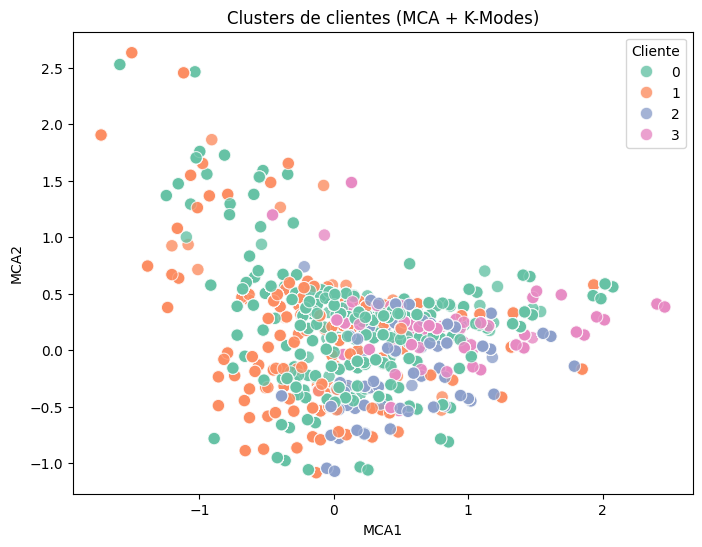

In [32]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import prince

# Convertir las columnas a tipo categórico (si aún no lo son)
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)
trans['Saldo'] = trans['balance'].apply(saldo_categorico)
trans = trans[["Clase de edad", "job", "marital", "education"]]
for col in trans.columns:
    trans[col] = trans[col].astype('category')

# Inicializar el modelo K-Modes
kmodes = KModes(n_clusters=4, init='Cao', n_init=10, verbose=0, random_state=42)

# Aplicar el K-Modes al dataframe
clusters = kmodes.fit_predict(trans)

# Mostrar el dataframe con los clusters asignados
trans['Cliente'] = clusters

# Ver los resultados
print(trans)

# Ver los centroides de los clusters
print("Centroides de los clusters: ")
print(kmodes.cluster_centroids_)

trans["Cliente"].value_counts() #Para ver el reparto de grupos por clústers

import matplotlib.pyplot as plt

# MCA con prince
mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit_transform(trans.drop("Cliente", axis=1))

# Agregamos las coordenadas MCA al dataframe
trans["MCA1"] = mca_result[0]
trans["MCA2"] = mca_result[1]

# Graficamos
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trans, 
    x="MCA1", 
    y="MCA2", 
    hue="Cliente", 
    palette="Set2", 
    s=80, 
    alpha=0.8
)
plt.title("Clusters de clientes (MCA + K-Modes)")
plt.show()

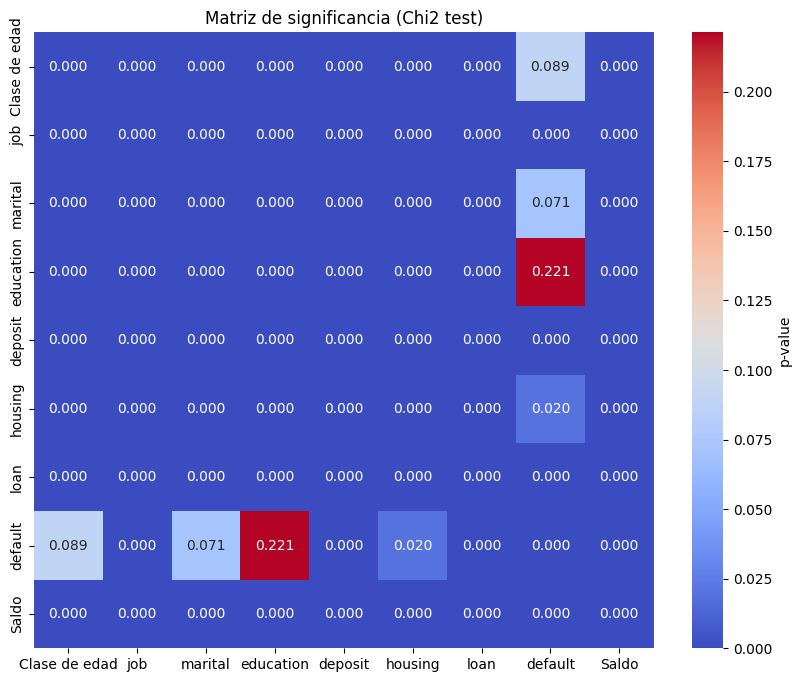

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from itertools import combinations

# Dataset (ya lo tienes)
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_22.09_dataset.csv"
trans = pd.read_csv(ruta)
trans['Saldo'] = trans['balance'].apply(saldo_categorico)
df = trans[["Clase de edad", "job", "marital", "education", "deposit", "housing", "loan","default","Saldo"]]

vars_categoricas = df.columns.tolist()

# Crear matriz vacía
p_matrix = pd.DataFrame(index=vars_categoricas, columns=vars_categoricas)

# Calcular p-values
for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    p_matrix.loc[v1, v2] = p
    p_matrix.loc[v2, v1] = p

# Rellenar la diagonal con 0
for v in vars_categoricas:
    p_matrix.loc[v, v] = 0

# Convertir a float
p_matrix = p_matrix.astype(float)

# Graficar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(p_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={"label": "p-value"})
plt.title("Matriz de significancia (Chi2 test)")
plt.show()

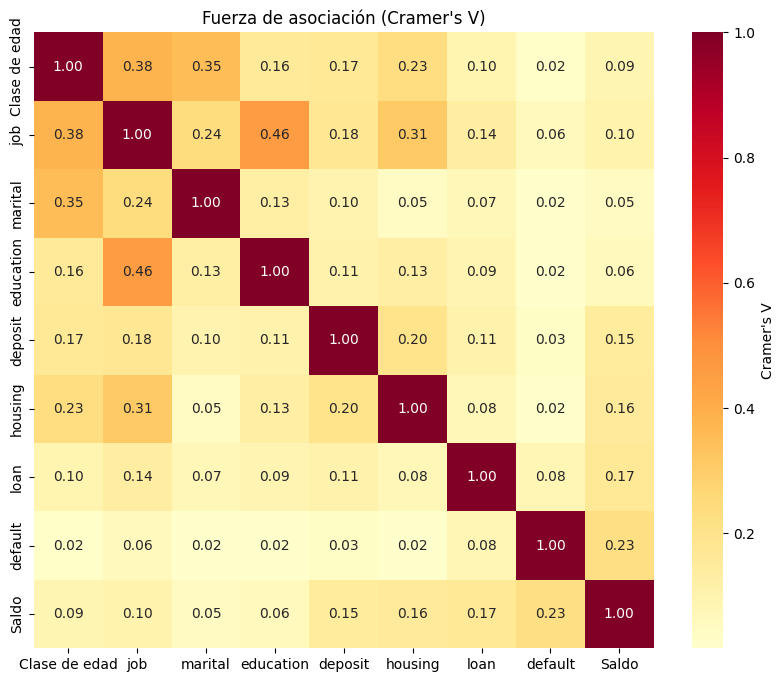

In [37]:
import numpy as np

# Matriz vacía para Cramer's V
cramers_matrix = pd.DataFrame(index=vars_categoricas, columns=vars_categoricas)

for v1, v2 in combinations(vars_categoricas, 2):
    tabla = pd.crosstab(df[v1], df[v2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    n = tabla.sum().sum()
    k = min(tabla.shape)  # min filas/cols
    cramers_v = np.sqrt((chi2/n) / (k-1))
    cramers_matrix.loc[v1, v2] = cramers_v
    cramers_matrix.loc[v2, v1] = cramers_v

for v in vars_categoricas:
    cramers_matrix.loc[v, v] = 1.0

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={"label": "Cramer's V"})
plt.title("Fuerza de asociación (Cramer's V)")
plt.show()